The steps of this project consists of the following sections:

1. Data Collection
2. Importing and Reading the datasets.
3. Data Exploration
4. Visualization
5. Feature Engineering
6. Text Preprocessing
7. Sentiment Analysis

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', 1000)

### 1. Importing and Reading Data


In [2]:
#Importing datasets
Obi_df = pd.read_csv('PeterObi.csv')
Bola_df = pd.read_csv('Bolatinubu.csv')
Atiku_df = pd.read_csv('Atikuabu.csv')


In [3]:
#Display the first 2 rows
Obi_df.head(2)

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Counts,Retweets_Count,Quote_Count,Reply_Count
0,0,2023-02-15 23:59:26+00:00,https://twitter.com/Bigkingzz1/status/1626008315091120130,Bigkingzz1,Twitter for iPhone,NaN,"@DEferode @PeterObi You dey shout Jesus, na Jesus tell una to dey sell money give the poor citizens ?\n\n@GodwinIEmefiele this is all your fault. Vote @PeterObi #NigeriaDecides2023",1,0,0,0
1,1,2023-02-15 23:59:24+00:00,https://twitter.com/thedreamreaper/status/1626008303841976324,thedreamreaper,Twitter for Android,NaN,@Antiok5 @ineclagos @inecnigeria @instablog9ja @NgLabour @PeterObi @PeterPsquare @rudeboypsquare Tagging INEC is a complete waste of time though. Everything now lies on the hands of the people. We must watch them with red eyes.,0,0,0,0


In [4]:
#Display the first 2 rows 
Bola_df.head(2)

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Counts,Retweets_Count,Quote_Count,Reply_Count
0,0,2023-02-15 23:59:30+00:00,https://twitter.com/Bundlehofjoy/status/1626008329884499969,Bundlehofjoy,Twitter for Android,NaN,@engloto2012 @GovWike @officialABAT Okay.,0,0,0,0
1,1,2023-02-15 23:59:18+00:00,https://twitter.com/Delejackson4/status/1626008280848900098,Delejackson4,Twitter for Android,NaN,"If not for Ethnic Sentiment, i don't think any right thinking man would Support @PeterObi over @officialABAT. Its a Sin Against Humanity.",2,1,0,0


In [5]:
#Display the first 2 rows 
Atiku_df.head(2)

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Counts,Retweets_Count,Quote_Count,Reply_Count
0,0,2023-02-15 23:58:52+00:00,https://twitter.com/KingDGen_N/status/1626008170060566528,KingDGen_N,Twitter Web App,NaN,"@mahbeel_A @atiku Papa, Mama, Pikin",0,0,0,0
1,1,2023-02-15 23:57:23+00:00,https://twitter.com/Invincible7god/status/1626007798445121536,Invincible7god,Twitter for Android,NaN,"@atiku Na you de always pull the bigger crowd during campaigns and ends up never winning, so no be today we know you.\nYou will still fail this time.\n\nObi is the man for the job.",112,2,0,2


### 2. Data Exploration

In [6]:
print('The shape for Obi_df is:', Obi_df.shape)
print('The shape for Bola_df is:', Bola_df.shape)
print('The shape for Atiku_df is:', Atiku_df.shape)


The shape for Obi_df is: (50000, 11)
The shape for Bola_df is: (50000, 11)
The shape for Atiku_df is: (50000, 11)


Observation:

Each datasets has 50000 rows and 11 columns. This uniformity in the number of rows and columns across the datasets indicates a consistent data structure and allows for easy comparison and Sentiment Analysis between the candidates.

In [7]:
# Check the summary of Obi_df
Obi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      50000 non-null  int64 
 1   Date            50000 non-null  object
 2   TweetURL        50000 non-null  object
 3   User            50000 non-null  object
 4   Source          50000 non-null  object
 5   Location        31988 non-null  object
 6   Tweet           50000 non-null  object
 7   Likes_Counts    50000 non-null  int64 
 8   Retweets_Count  50000 non-null  int64 
 9   Quote_Count     50000 non-null  int64 
 10  Reply_Count     50000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 4.2+ MB


In [8]:
# Check the summary of Bola_df
Bola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      50000 non-null  int64 
 1   Date            50000 non-null  object
 2   TweetURL        50000 non-null  object
 3   User            50000 non-null  object
 4   Source          50000 non-null  object
 5   Location        32351 non-null  object
 6   Tweet           50000 non-null  object
 7   Likes_Counts    50000 non-null  int64 
 8   Retweets_Count  50000 non-null  int64 
 9   Quote_Count     50000 non-null  int64 
 10  Reply_Count     50000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 4.2+ MB


In [9]:
# Check the summary of Atiku_df
Atiku_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      50000 non-null  int64 
 1   Date            50000 non-null  object
 2   TweetURL        50000 non-null  object
 3   User            50000 non-null  object
 4   Source          50000 non-null  object
 5   Location        32567 non-null  object
 6   Tweet           50000 non-null  object
 7   Likes_Counts    50000 non-null  int64 
 8   Retweets_Count  50000 non-null  int64 
 9   Quote_Count     50000 non-null  int64 
 10  Reply_Count     50000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 4.2+ MB


 **Checking for Missing Values for each Dataframes**

In [10]:
#Checking for missing values in Obi_df 

features_with_nan = [feature for feature in Obi_df.columns if Obi_df[feature].isnull().sum() > 0]

for feature in features_with_nan:
    missing_count = Obi_df[feature].isnull().sum()
    missing_percentage = np.round(Obi_df[feature].isnull().mean() * 100, 1)
    print(f"{feature} feature has {missing_count} missing values ({missing_percentage}% missing)")


Location feature has 18012 missing values (36.0% missing)


<AxesSubplot:>

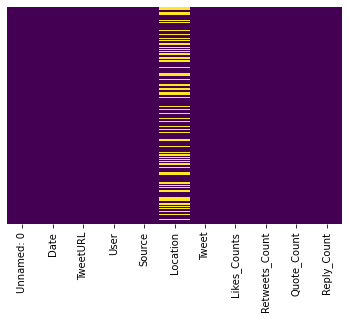

In [11]:
sns.heatmap(Obi_df.isnull(), yticklabels= False, cbar= False, cmap= 'viridis')

In [12]:

Obi_df_Locations = [i for i in Obi_df['Location'].unique()]
Obi_df_Locations


[nan,
 'Federal Capital Territory, Nig',
 'Hamm, Deutschland',
 'ikorodu lagos ',
 'Saskatchewan, Canada',
 'Nnewi',
 'karl-marx-stadt',
 "King's Landing",
 'Abuja, Nigeria',
 'Lagos, Nigeria',
 'Dallas, TX',
 'lagos in nigeria',
 'Nigeria',
 'United States 🇺🇸',
 'San Francisco, CA',
 'New York, USA',
 '70% Happy, 20% Sad, 10% Unsure',
 'Warri, Nigeria',
 'Somewhere x the creek 🌎🌍🌏',
 'Naperville, IL',
 'Surulere',
 'Edo state',
 'Liverpool, England ',
 'London, England',
 'FCT ABUJA',
 'Kano, Nigeria',
 'U. S. A. ',
 'Rhode Island, USA',
 'Ikorodu',
 'Sweden ',
 '🌍',
 'Nigeria 🇳🇬 ',
 '🇳🇬🇺🇸',
 '🌎',
 'Lagos',
 'Good hand companion ',
 'Augusta, GA',
 'Jos, Nigeria',
 'Sapa capital of the world. ',
 'Enugu, Nigeria',
 'Àbétè',
 'Bikini Bottom',
 'BAYELSA',
 'Magodo-Lagos',
 '🌏',
 'Utopia ',
 'Perth, Western Australia',
 'Ozuitem ',
 'lagos',
 'Kaduna',
 'London ',
 'Benin-City, Nigeria',
 'NIGERIA',
 'Nigera',
 'Lagos/London/Dublin',
 'Lagos-Nigeria.',
 'Asaba, Nigeria',
 'Where kids gig

In [13]:
Obi_unique_Locations = len(Obi_df['Location'].unique())
print(f'Obi_df has {Obi_unique_Locations} unique locations')

Obi_df has 5006 unique locations


In [14]:
#Checking for missing values in Bola_df 

features_with_nan = [feature for feature in Bola_df.columns if Bola_df[feature].isnull().sum() > 0]

for feature in features_with_nan:
    missing_count = Bola_df[feature].isnull().sum()
    missing_percentage = np.round(Bola_df[feature].isnull().mean() * 100, 1)
    print(f"{feature} feature has {missing_count} missing values ({missing_percentage}% missing)")

Location feature has 17649 missing values (35.3% missing)


<AxesSubplot:>

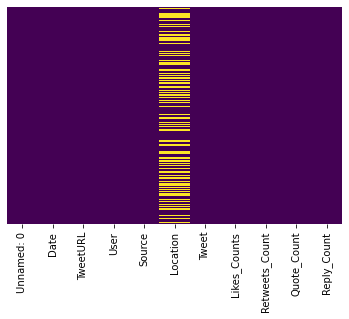

In [15]:
sns.heatmap(Bola_df.isnull(), yticklabels= False, cbar= False, cmap= 'viridis')

In [16]:
Bola_df_Locations = [i for i in Bola_df['Location'].unique()]
Bola_df_Locations

[nan,
 'Johannesburg, South Africa',
 'Rivers state',
 'Nigeria',
 'Lagos, Nigeria',
 'Toronto, Ontario',
 'Lagos ',
 'Near you',
 '1600, Twitter Avenue.',
 'Dog centre, Command Sch,Ipaja ',
 'Retweets are not Endorsements ',
 'World',
 'KWARA',
 '📍',
 'Imo, Nigeria',
 'Kano, Nigeria ',
 'Warri, Nigeria',
 'kitchen',
 'Port-Harcourt and Texas',
 ' Nigeria',
 'U. S. A. ',
 'Nigeria ',
 'Lagos Nigeria',
 'Beverly Hills, CA',
 'Abuja, Nigeria',
 'close to you',
 'earth',
 '🇳🇬🇺🇸',
 'Worldwide',
 'Los Lagos, Chile',
 'Ilorin, Nigeria',
 'Earth',
 'Isolo, Nigeria',
 'Ibi ori da mi si.',
 'Ontop Igi Iroko',
 'Ogbe! ',
 'United Kingdom',
 'South Africa',
 '🌍',
 'Lagos',
 'Benin-City, Nigeria',
 ' Proudly Naija',
 'Lagos Nigeria ',
 'London, England',
 'somewheresafe',
 'Eleyi, Ogun State',
 'Federal Capital Territory, Nig',
 'Stirling, Scotland',
 'Leeds, England',
 'Ibadan Nigeria',
 'Maiduguri, Nigeria',
 'some where far from home',
 'Heaven 🌎 ',
 'Surulere',
 'Metaverse',
 'الأرض',
 'Web si

In [17]:
Bola_unique_Locations = len(Bola_df['Location'].unique())
print(f'Bola_df has {Bola_unique_Locations} unique locations')

Bola_df has 4995 unique locations


In [18]:
#Checking for missing values in Atiku_df 

features_with_nan = [feature for feature in Atiku_df.columns if Atiku_df[feature].isnull().sum() > 0]

for feature in features_with_nan:
    missing_count = Atiku_df[feature].isnull().sum()
    missing_percentage = np.round(Atiku_df[feature].isnull().mean() * 100, 1)
    print(f"{feature} feature has {missing_count} missing values ({missing_percentage}% missing)")

Location feature has 17433 missing values (34.9% missing)


<AxesSubplot:>

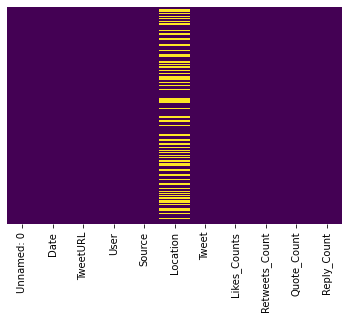

In [19]:
sns.heatmap(Atiku_df.isnull(), yticklabels= False, cbar= False, cmap= 'viridis')

In [20]:
Atiku_df_Locations = [i for i in Atiku_df['Location'].unique()]
Atiku_df_Locations

[nan,
 'Jakarta Capital Region',
 'Bauchi, Nigeria',
 'Japan',
 'Nnewi',
 '1600, Twitter Avenue.',
 'Abu Dhabi, United Arab Emirates',
 'Warri, Nigeria',
 'Federal Capital Territory, Nig',
 'Right there in your heart ',
 'Benin-City, Nigeria',
 'Lere, Nigeria',
 'Abuja',
 'Nigeria',
 'Accra Ghana ',
 'Abuja, Nigeria ',
 'Abuja, Nigeria',
 'Zamfara, Nigeria',
 'ajah lagos',
 'Adamawa state, jimeta-yola',
 'Zaria, Nigeria',
 'kazaure Jigawa state',
 'Kebbi, Nigeria',
 'Lagos, Nigeria',
 'Sokoto, Nigeria',
 'Abuja ',
 'Kano, Nigeria',
 'Nigeria🅾',
 'Abuja in Nigeria',
 'Hammersmith, London',
 'North West',
 'Lagos Nigeria ',
 'Africa',
 'Kano, Nigeria🇳🇬',
 'Nigera',
 'TRENCHES',
 'Nigeria ',
 'Gombe, Nigeria',
 'Lagos',
 'Kwara, Nigeria',
 'Area 11, Abuja',
 'Enugu, Nigeria',
 'Ilorin, Nigeria',
 'Ibadan, Nigeria',
 'Warri',
 'Somewhere Amazing in Africa.',
 'الأرض',
 'Maryland, USA',
 'Kafin Hausa, Nigeria ',
 ' Nigeria',
 'Dutse, Nigeria',
 'Warri, Delta State ',
 'Temporary on Earth ',

In [21]:
Atiku_unique_Locations = len(Atiku_df['Location'].unique())
print(f'Bola_df has {Atiku_unique_Locations} unique locations')

Bola_df has 4565 unique locations


Obaservation:

In the dataset, the Location column of each dataframes contain high missing values. Moreover, these columns exhibit over 4000 unique values. It is important to note that the presence of missing values and the high number of unique locations can introduce bias in the analysis when investigating the Location variable.

**Merging the 3 dataframes**

In [22]:
# Adding a new column to differentiate between tweets of Obi, Bola and Atiku
Obi_df["Candidate"]  = "Peter Obi"
Bola_df["Candidate"] = "Bola Tinubu"
Atiku_df["Candidate"]= "Atiku Abubakar"

# ignore the SettingWithCopyWarning
pd.options.mode.chained_assignment = None


In [23]:
#Combine the new data frames into one dataframe
df = pd.concat([Obi_df,Bola_df,Atiku_df],ignore_index=True)
#saving to my local desktop

df.to_csv('total_data.csv', index=False)
df.head(2)

In [24]:
df.tail(2)

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Counts,Retweets_Count,Quote_Count,Reply_Count,Candidate
149998,49998,2023-01-31 12:15:54+00:00,https://twitter.com/nwa042legit/status/1620395447021096986,nwa042legit,Twitter for Android,"Federal Capital Territory, Nig",@Chimato5 @OfficialPDPNig @atiku @ABATMediaCentre @woye1 @StFreakingKezy @AdaAnambra2023 @Qdpaper2 I love what am seeing...,2,0,0,0,Atiku Abubakar
149999,49999,2023-01-31 12:15:51+00:00,https://twitter.com/MansurAbba7/status/1620395434157146113,MansurAbba7,Twitter for Android,"Girei, Adamawa.",@AWaziri7 @atiku I will vote for him Insha Allah,0,0,0,0,Atiku Abubakar


**Duplicate Tweets**

In [25]:
# Identify duplicate tweets in the DataFrame
duplicate_tweets = df[df.duplicated('Tweet')]
print(f'There are {len(duplicate_tweets)} duplicate tweets')

There are 8280 duplicate tweets


Observation:

Duplicate tweets can skew Sentiment analysis and will be removed during feature engineering

### 3. Visualization

In [26]:
#check unique sources
source_names = df.Source.value_counts().index
source_names

Index(['Twitter for Android', 'Twitter for iPhone', 'Twitter Web App',
       'Twitter for iPad', 'TweetDeck', 'dlvr.it', 'Twitter for Mac', 'IFTTT',
       'Hootsuite Inc.', 'FS Poster 3', 'Radio King LiveTweet',
       'ThreadReaderApp', 'Obidatti', 'DadGumBot', 'DDLVid Bot', 'Jetpack.com',
       'TrafficChiefNG', 'SocialFlow', 'SocialChamp IO ',
       'RC Engage Digital EU', 'TweetDeck Web App', 'white bird!', 'Instagram',
       'Hey Wallet'],
      dtype='object')

In [27]:
# Calculate the count of occurrences for each unique value in the 'Source' column
source_values=df.Source.value_counts().values
source_values

array([102236,  38601,   8814,    222,     41,     15,     13,     11,
           10,      8,      6,      4,      3,      3,      3,      2,
            1,      1,      1,      1,      1,      1,      1,      1],
      dtype=int64)

([<matplotlib.patches.Wedge at 0x1d4041bea60>,
 [Text(-0.6530275973231325, 1.006754665812072, 'Twitter for Android'),
  Text(0.4186064514469065, -1.0172357832906926, 'Twitter for iPhone'),
  Text(1.0812236874188774, -0.20237425173259022, 'Twitter Web App')],
 [Text(-0.3809327651051606, 0.5872735550570419, '68.32%'),
  Text(0.2283307916983126, -0.5548558817949232, '25.79%'),
  Text(0.5897583749557512, -0.11038595549050374, '5.89%')])

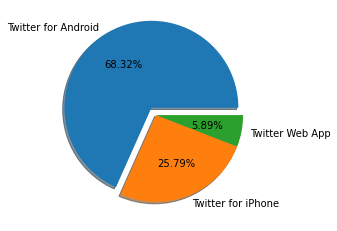

In [28]:
plt.pie(source_values[:3], labels = source_names[:3],shadow=True,explode = [0.1, 0, 0],autopct='%1.2f%%')

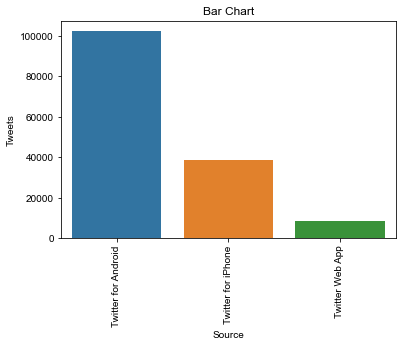

In [29]:
sns.barplot(x=source_names[:3], y=source_values[:3])
sns.set_style('whitegrid')
plt.title("Bar Chart")
plt.xlabel("Source")
plt.ylabel("Tweets")
plt.xticks(rotation=90)

plt.show()


Observation:
    
It was observed that a significant proportion of tweets (68.32%) amounting to more than 100,000 tweets were generated from Android phones. The second highest source of tweets was iPhones, accounting for 25.79% of the total tweets. These observations indicate that Android devices are the most commonly used for tweeting, followed by iPhones.

In [30]:
df.columns

Index(['Unnamed: 0', 'Date', 'TweetURL', 'User', 'Source', 'Location', 'Tweet',
       'Likes_Counts', 'Retweets_Count', 'Quote_Count', 'Reply_Count',
       'Candidate'],
      dtype='object')

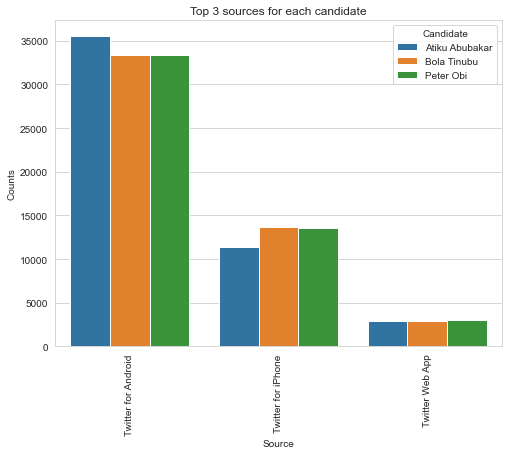

In [31]:
source_ranking = df.groupby(['Source', 'Candidate']).size().reset_index(name='counts')
source_ranking = source_ranking.sort_values('counts')

df_sorted = source_ranking.groupby('Candidate').apply(lambda x: x.nlargest(3, 'counts')).reset_index(drop=True)

# Plot the grouped bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=df_sorted, x='Source', y='counts', hue='Candidate')
plt.xlabel('Source')
plt.ylabel('Counts')
plt.title('Top 3 sources for each candidate')
plt.xticks(rotation=90)
plt.legend(title='Candidate')

# Show the plot
plt.show()


Observation:
    
It was observed that Atiku Abubarkar had the highest number of users tweeting from an Android device. On the other hand, Bola Tinubu and Peter Obi had a similar number of users who tweeted from both Android and iPhone devices. This suggests that Atiku Abubarkar's supporters predominantly use Android devices for tweeting, while the supporters of Bola Tinubu and Peter Obi show a more balanced usage of both Android and iPhone devices.

In [32]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the Year, Month, Day, and Hour components into separate columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour

In [33]:
df.head(2)

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Counts,Retweets_Count,Quote_Count,Reply_Count,Candidate,Year,Month,Day,Hour
0,0,2023-02-15 23:59:26+00:00,https://twitter.com/Bigkingzz1/status/1626008315091120130,Bigkingzz1,Twitter for iPhone,NaN,"@DEferode @PeterObi You dey shout Jesus, na Jesus tell una to dey sell money give the poor citizens ?\n\n@GodwinIEmefiele this is all your fault. Vote @PeterObi #NigeriaDecides2023",1,0,0,0,Peter Obi,2023,2,15,23
1,1,2023-02-15 23:59:24+00:00,https://twitter.com/thedreamreaper/status/1626008303841976324,thedreamreaper,Twitter for Android,NaN,@Antiok5 @ineclagos @inecnigeria @instablog9ja @NgLabour @PeterObi @PeterPsquare @rudeboypsquare Tagging INEC is a complete waste of time though. Everything now lies on the hands of the people. We must watch them with red eyes.,0,0,0,0,Peter Obi,2023,2,15,23


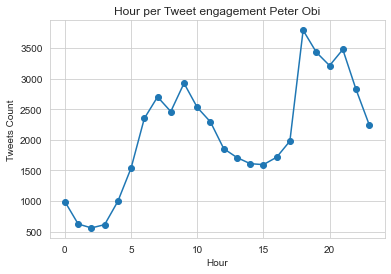

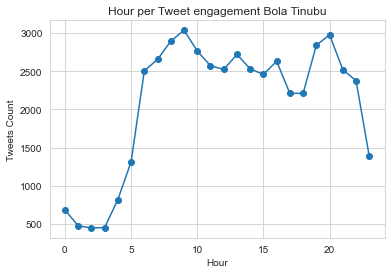

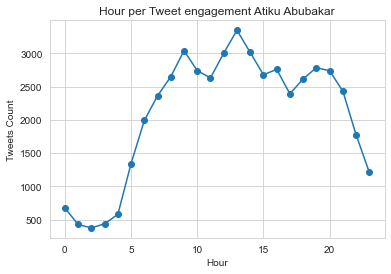

In [34]:

# Group the data by Hour and Candidate, and count the number of tweets
tweet_counts = df.groupby(['Hour', 'Candidate']).size().reset_index(name='Tweet Count')

# Iterate through the unique candidates
for candidate in df['Candidate'].unique():
    # Filter the tweet counts for the current candidate
    candidate_counts = tweet_counts[tweet_counts['Candidate'] == candidate]

    # Create a new plot for the current candidate
    plt.figure()
    
    # Create a line chart of Hour per Tweet for the current candidate
    plt.plot(candidate_counts['Hour'], candidate_counts['Tweet Count'], marker='o')

    # Set chart title and labels for the current candidate
    plt.title(f'Hour per Tweet engagement {candidate}')
    plt.xlabel('Hour')
    plt.ylabel('Tweets Count')

# Show the plots
plt.show()


Observation:
Based on the observed data, it can be concluded that there are distinct patterns of tweet engagement for three prominent individuals: Peter Obi, Bola Tinubu, and Atiku Abubakar. The time periods with the highest tweet engagement for each individual are as follows:

- Peter Obi: The peak engagement for Peter Obi's tweets occurs at 09:00 and 18:00. This indicates that his tweets receive a significant level of attention and interaction during these specific time slots.

- Bola Tinubu: Bola Tinubu experiences the highest tweet engagement at 09:00 and 20:00. Similar to Peter Obi, Tinubu's tweets garner considerable interest and participation during these particular hours.

- Atiku Abubakar: Atiku Abubakar's tweets receive the most engagement at 09:00 and 13:00. It is noteworthy that Atiku Abubakar's peak engagement period differs from the other two individuals, indicating a unique pattern specific to his tweets.


In [35]:
df.columns

Index(['Unnamed: 0', 'Date', 'TweetURL', 'User', 'Source', 'Location', 'Tweet',
       'Likes_Counts', 'Retweets_Count', 'Quote_Count', 'Reply_Count',
       'Candidate', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

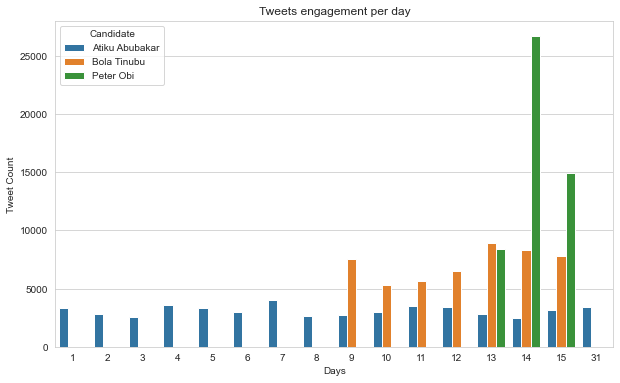

In [36]:
# Group the data by Candidate, Day of the Week, and count the number of tweets
tweet_counts = df.groupby(['Candidate', 'Day']).size().reset_index(name='Tweet Count')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=tweet_counts, x='Day', y='Tweet Count', hue='Candidate')

# Set chart title and labels
plt.title('Tweets engagement per day')
plt.xlabel('Days')
plt.ylabel('Tweet Count')

# Move the legend to the left side
plt.legend(loc='upper left', title='Candidate')

# Show the plot
plt.show()


Observation:


- Peter Obi: Despite tweeting on only 3 out of the 16 days analyzed, Peter Obi had the highest tweet engagement per day among the three candidates. This implies that the tweets he posted during those limited days generated substantial engagement and interaction from the Twitter community.

- Bola Tinubu: Bola Tinubu was active on Twitter, posting tweets on 7 out of the 16 days analyzed. While he maintained a consistent presence on the platform, his level of engagement may have been lower compared to Peter Obi but higher than Atiku Abubakar

- Atiku Abubakar: In contrast to the other candidates, Atiku Abubakar demonstrated a high level of dedication by tweeting every single day during the 16-day analysis period. However, despite this consistent Twitter presence, Abubakar's tweet count remained relatively lower compared to both Peter Obi and Bola Tinubu. This suggests that his core supporters may not be as active or vocal on the Twitter platform as those of the other candidates.

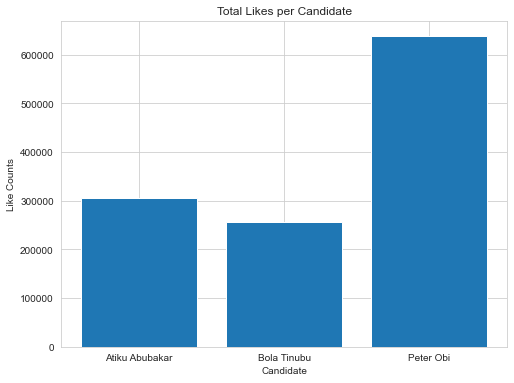

In [37]:
likes_counts = df.groupby('Candidate')['Likes_Counts'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(likes_counts['Candidate'], likes_counts['Likes_Counts'])

# Set chart title and labels
plt.title('Total Likes per Candidate')
plt.xlabel('Candidate')
plt.ylabel('Like Counts')

# Show the plot
# Group the data by Candidate and calculate the total number of likes
plt.show()


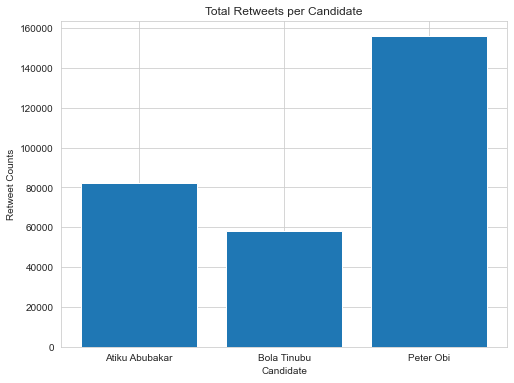

In [38]:
# Group the data by Candidate and calculate the total number of retweets
retweets_counts = df.groupby('Candidate')['Retweets_Count'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(retweets_counts['Candidate'], retweets_counts['Retweets_Count'])

# Set chart title and labels
plt.title('Total Retweets per Candidate')
plt.xlabel('Candidate')
plt.ylabel('Retweet Counts')

# Show the plot
plt.show()


In [39]:
df.columns

Index(['Unnamed: 0', 'Date', 'TweetURL', 'User', 'Source', 'Location', 'Tweet',
       'Likes_Counts', 'Retweets_Count', 'Quote_Count', 'Reply_Count',
       'Candidate', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

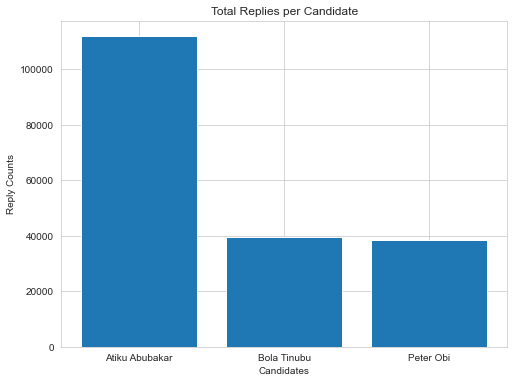

In [40]:
# Group the data by Candidate and calculate the total number of retweets
Reply_counts = df.groupby('Candidate')['Reply_Count'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(Reply_counts['Candidate'], Reply_counts['Reply_Count'])

# Set chart title and labels
plt.title('Total Replies per Candidate')
plt.xlabel('Candidates')
plt.ylabel('Reply Counts')

# Show the plot
plt.show()

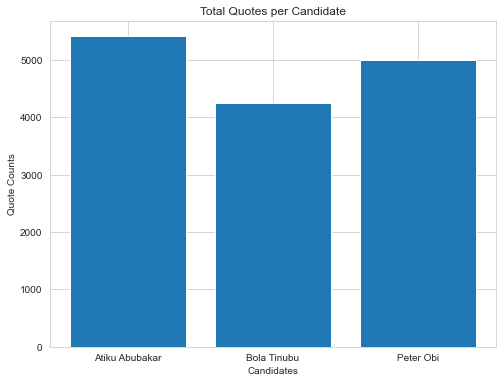

In [41]:
# Group the data by Candidate and calculate the total number of retweets
Quote_Counts = df.groupby('Candidate')['Quote_Count'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(Quote_Counts['Candidate'], Quote_Counts['Quote_Count'])

# Set chart title and labels
plt.title('Total Quotes per Candidate')
plt.xlabel('Candidates')
plt.ylabel('Quote Counts')

# Show the plot
plt.show()

Observation:


Users engagement with tweets related to Peter Obi, Atiku Abubakar, and Bola Tinubu had several notable patterns emerge that shed light on the popularity and engagement levels of each candidate. The observations can be summarized as follows:

- Peter Obi: Tweets associated with Peter Obi received the highest number of likes and retweets from users. This suggests a significant level of popularity and resonance among the Twitter community. The high engagement with Obi's tweets indicates that his messages and content are well-received and actively shared by users.

- Atiku Abubakar: In contrast to Peter Obi, tweets related to Atiku Abubakar garnered more quotes and replies from users. While the tweet count in terms of likes and retweets may not have been as high, the substantial engagement through quotes and replies suggests a strong level of interaction and conversation surrounding Abubakar's tweets. This indicates that his messages spark discussions and elicit direct responses from the Twitter community.

- Bola Tinubu: Among the three candidates, tweets related to Bola Tinubu received the lowest number of likes, quotes, and retweets from users. This implies that Tinubu's tweets may not have generated as much attention or interest compared to Peter Obi and Atiku Abubakar. The lower engagement levels could be attributed to various factors such as the content of the tweets, the audience demographics, or the overall social media strategy employed by Tinubu's campaign.








